In [0]:
!pip install -U finance-datareader
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')

In [0]:
import pandas as pd
import numpy as np

In [0]:
#name=input('주식 코드 기업명 ?') #find 종목코드 및 정보
#df_krx[df_krx['Name'].str.contains(name)]

In [0]:
KOSPI = fdr.DataReader('KS11', '2015-01-01','2019-11-25')
SAMSUNG = fdr.DataReader('005930', '2015-01-01','2019-11-25')
KEPCO = fdr.DataReader('015760', '2015-01-01','2019-11-25')
SKtelecom = fdr.DataReader('017670', '2015-01-01','2019-11-25')
POSCO = fdr.DataReader('005490', '2015-01-01','2019-11-25')
HYUNDAI = fdr.DataReader('005380', '2015-01-01','2019-11-25')

In [0]:
df = pd.concat([KOSPI['Close'],SAMSUNG['Close'],KEPCO['Close'],SKtelecom['Close'],POSCO['Close'],HYUNDAI['Close']], axis=1)
df.set_axis(['KOSPI','SAMSUNG','KEPCO','SKtelecom','POSCO','HYUNDAI'],axis=1,inplace=True)
#df.columns = ['KOSPI','SAMSUNG','KEPCO','SKtelecom','POSCO','HYUNDAI']

In [0]:
df.head(3)

,KOSPI,SAMSUNG,KEPCO,SKtelecom,POSCO,HYUNDAI
Date,,,,,,
2015-01-02,1926.44,26600,42700,272500,283500,169000
2015-01-05,1915.75,26660,42000,276500,279000,168000
2015-01-06,1882.45,25900,41850,274500,275000,164500


In [0]:
df_rev = df.diff(axis=0 , periods=1)/df.shift(periods=1)
df_rev = df_rev.dropna()

In [0]:
import datetime

In [0]:
df_rev['day'] = df_rev.index.weekday_name
df_rev['year'] = df_rev.index.year
df_rev['month'] = df_rev.index.month

In [0]:
df_rev.tail(3)

,KOSPI,SAMSUNG,KEPCO,SKtelecom,POSCO,HYUNDAI,day,year,month
Date,,,,,,,,,
2019-11-21,-0.013513,-0.019231,-0.008881,-0.012270,-0.008989,0.000000,Thursday,2019,11
2019-11-22,0.002557,0.011765,0.003584,0.012422,-0.002268,-0.008032,Friday,2019,11
2019-11-25,0.010248,0.003876,-0.005357,0.006135,0.036364,0.012146,Monday,2019,11


# 20191128

## 과업 5개의 주가 월별 수익률을 구하시오.

In [0]:
df_rev['month2'] = df_rev['year'].astype(str)+'_'+df_rev['month'].astype(str)

In [0]:
rev_m = df_rev.groupby(['month2']).mean().iloc[:,0:6]
rev_m.head()

,KOSPI,SAMSUNG,KEPCO,SKtelecom,POSCO,HYUNDAI
month2,,,,,,
2015_1,0.000616,0.001383,0.000822,0.003026,-0.005513,0.000310
2015_10,0.001606,0.009324,0.002367,-0.004075,0.003938,-0.002254
2015_11,-0.000852,-0.003046,-0.002214,-0.001336,-0.003352,-0.002570
2015_12,-0.000708,-0.000825,0.001109,-0.003753,-0.000492,0.000560
2015_2,0.001102,-0.000302,0.002169,-0.000403,0.003481,-0.003080


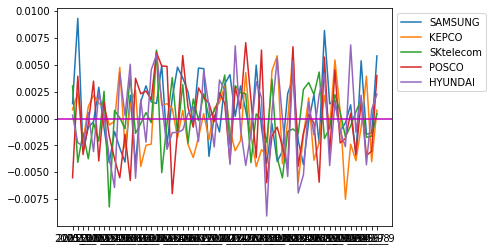

In [0]:
import matplotlib.pyplot as plt
plt.plot(rev_m.index, rev_m[['SAMSUNG','KEPCO','SKtelecom','POSCO','HYUNDAI']])
plt.legend(rev_m[['SAMSUNG','KEPCO','SKtelecom','POSCO','HYUNDAI']],bbox_to_anchor=(1,1))
plt.axhline(y=0, color='m')

plt.show()


## 삼성전자 요일별, 연도별 수익률 나무상자그림을 그리시오.

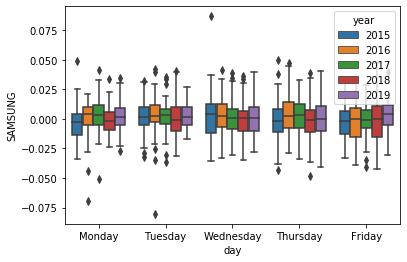

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='day', y='SAMSUNG', hue='year', data=df_rev)

plt.show()

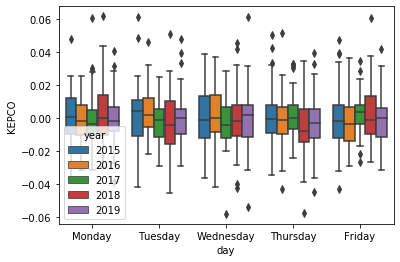

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='day', y='KEPCO', hue='year', data=df_rev)

plt.show()

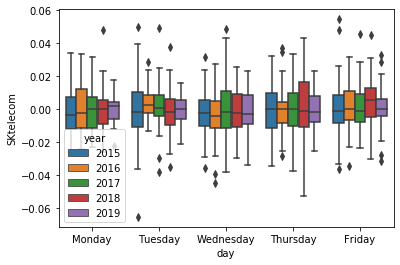

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='day', y='SKtelecom', hue='year', data=df_rev)

plt.show()

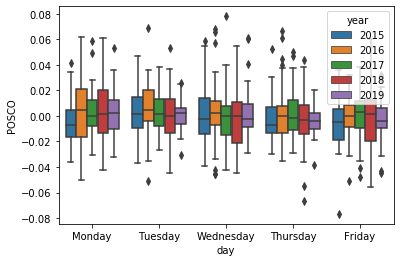

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='day', y='POSCO', hue='year', data=df_rev)

plt.show()

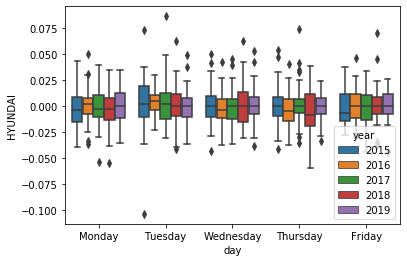

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='day', y='HYUNDAI', hue='year', data=df_rev)

plt.show()

#20191203

##과업 연도별 기업별 나무상자그림을 그리시오. (숙제, 선형대수로 모두 바꾸기)

In [0]:
df_rev.head(2)

,KOSPI,SAMSUNG,KEPCO,SKtelecom,POSCO,HYUNDAI,day,year,month,month2
Date,,,,,,,,,,
2015-01-05,-0.005549,0.002256,-0.016393,0.014679,-0.015873,-0.005917,Monday,2015,1,2015_1
2015-01-06,-0.017382,-0.028507,-0.003571,-0.007233,-0.014337,-0.020833,Tuesday,2015,1,2015_1


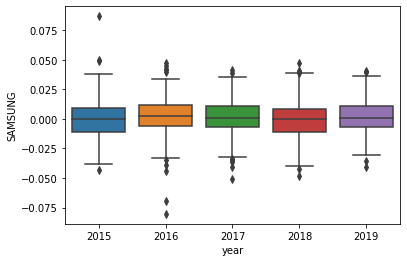

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='year', y='SAMSUNG', data=df_rev)

plt.show()

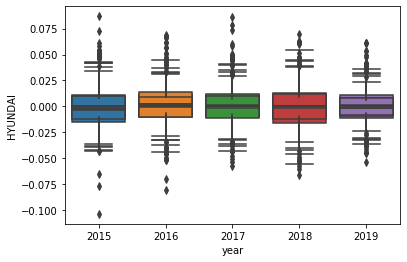

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='year', y='SAMSUNG', data=df_rev)
sns.boxplot(x='year', y='KEPCO', data=df_rev)
sns.boxplot(x='year', y='SKtelecom', data=df_rev)
sns.boxplot(x='year', y='POSCO', data=df_rev)
sns.boxplot(x='year', y='HYUNDAI', data=df_rev)

plt.show()

##과업 포토폴리오를 다음과 같이 구성하였다.

In [0]:
import numpy as np

p1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
p2 = np.array([0.4, 0.1, 0.4, 0.1, 0.0])
p3 = np.array([0.1, 0.2, 0.1, 0.4, 0.2])

###df_exp

##과업 연도별 5개 기업의 기대 수익률

In [0]:
df_exp = df_rev.groupby(['year']).mean().iloc[:,1:6]
df_exp.head()

,SAMSUNG,KEPCO,SKtelecom,POSCO,HYUNDAI
year,,,,,
2015,-0.000082,0.000794,-0.000813,-0.001965,-0.000320
2016,0.001601,-0.000396,0.000244,0.002014,0.000039
2017,0.001539,-0.000500,0.000834,0.001222,0.000442
2018,-0.000985,-0.000414,0.000149,-0.001050,-0.000939
2019,0.001419,-0.000651,-0.000356,-0.000170,0.000358


In [0]:
p1_exp = p1*df_exp
p2_exp = p2*df_exp
p3_exp = p3*df_exp

In [0]:
p2@df_exp

SAMSUNG      0.000644
KEPCO        0.000037
SKtelecom    0.000048
POSCO       -0.000201
HYUNDAI     -0.000041
dtype: float64

In [0]:
pe1 = p1_exp.sum(axis=1)
pe2 = p2_exp.sum(axis=1)
pe3 = p3_exp.sum(axis=1)

In [0]:
p_exp = pd.concat([(p1*df_exp).sum(axis=1),(p2*df_exp).sum(axis=1),(p3*df_exp).sum(axis=1)],axis=1)
p_exp.columns=['p1','p2','p3']

In [0]:
p_exp

,p1,p2,p3
year,,,
2015,-0.000477,-0.000475,-0.000781
2016,0.000700,0.000900,0.000919
2017,0.000708,0.001022,0.000715
2018,-0.000648,-0.000481,-0.000774
2019,0.000120,0.000343,-0.000020


###df_var

##과업 연도별 5개 기업 수익률 분산(위험)을 구하시오.

In [0]:
df_var = df_rev.groupby(['year']).var().iloc[:,1:6]
df_var.head()

,SAMSUNG,KEPCO,SKtelecom,POSCO,HYUNDAI
year,,,,,
2015,0.000277,0.000313,0.000275,0.000376,0.000381
2016,0.000290,0.000238,0.000174,0.000484,0.000246
2017,0.000226,0.000185,0.000225,0.000343,0.000343
2018,0.000285,0.000338,0.000222,0.000471,0.000375
2019,0.000211,0.000255,0.000110,0.000237,0.000237


In [0]:
p_var = pd.concat([(p1*df_var).sum(axis=1),(p2*df_var).sum(axis=1),(p3*df_var).sum(axis=1)],axis=1)
p_var.columns=['p1','p2','p3']

In [0]:
p_var

,p1,p2,p3
year,,,
2015,0.000324,0.000290,0.000344
2016,0.000286,0.000258,0.000337
2017,0.000264,0.000233,0.000288
2018,0.000338,0.000284,0.000382
2019,0.000210,0.000178,0.000225


###df_cov

In [0]:
df_cov15 = df_rev.groupby(['year']).cov().iloc[1:6,1:6]
df_cov16 = df_rev.groupby(['year']).cov().iloc[8:13,1:6]
df_cov17 = df_rev.groupby(['year']).cov().iloc[15:20,1:6]
df_cov18 = df_rev.groupby(['year']).cov().iloc[22:27,1:6]
df_cov19 = df_rev.groupby(['year']).cov().iloc[29:34,1:6]

In [0]:
p_cov = pd.concat([df_cov15,df_cov16,df_cov17,df_cov18,df_cov19],axis=0)

In [0]:
p_cov.iloc[0:5,0:5]

SAMSUNG         KEPCO  SKtelecom     POSCO   HYUNDAI
year                                                                     
2015 SAMSUNG    2.767093e-04 -5.836379e-07   0.000022  0.000049  0.000048
     KEPCO     -5.836379e-07  3.130445e-04   0.000075  0.000077  0.000059
     SKtelecom  2.222014e-05  7.528926e-05   0.000275  0.000027 -0.000009
     POSCO      4.860726e-05  7.658277e-05   0.000027  0.000376  0.000088
     HYUNDAI    4.842083e-05  5.864423e-05  -0.000009  0.000088  0.000381

##과업 연도별 기대수익률 최대 포토폴리오를 출력하시오. 만약에 수익률이 음수이면 없음이라고 출력하시오.

2015년 없음

2016년 p3

2017년 p2

2018년 없음

2019년 p2